In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import glob
from mpl_toolkits.mplot3d import Axes3D
import random


# Task 1

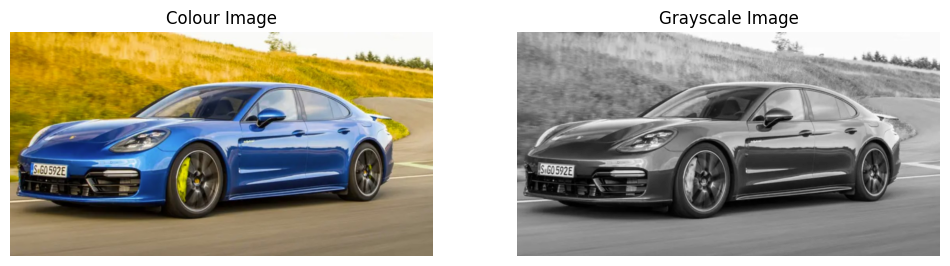

In [5]:
# Question 1.1: Take an image, read it in color and grayscale
image = cv2.imread(r'C:\Users\devTe\Desktop\MAS512\Assignment1\images\porche_panamera_blue.jpg') # Add the correct path to the image, 
#I have two images in the folder, one is in color red and second blue
image_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Display the color and grayscale images side by side (Figure 1)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Colour Image')
ax[0].axis('off')

ax[1].imshow(image_grayscale, cmap='gray')
ax[1].set_title('Grayscale Image')
ax[1].axis('off')

plt.show()

In [6]:
import numpy as np
from PIL import Image

In [7]:
import numpy as np
from PIL import Image

In [8]:
# Step 1: Generate matrices A and B
A = np.random.randn(64, 64).astype(np.int32)
B = np.random.randn(64, 64).astype(np.int32)
image_A = Image.fromarray(A)
image_B = Image.fromarray(B)
H_A = np.hstack((A, B))
H_B = np.vstack((A, B))
image_H_A = Image.fromarray(H_A)
image_H_B = Image.fromarray(H_B)
array_H_A = np.array(image_H_A)
array_H_B = np.array(image_H_B)


image_H_A.show()
image_H_B.show()


In [9]:
# Chessboard test:
# Step 1: Generate a chessboard pattern
def create_chessboard(size):
    chessboard = np.zeros((size, size), dtype=np.int32)
    s = size // 8
    for i in range(8):
        for j in range(8):
            if (i + j) % 2 == 0:
                chessboard[i*s:(i+1)*s, j*s:(j+1)*s] = 255  # White square
    return chessboard

A = create_chessboard(64)
B = create_chessboard(64)

# Step 2: Convert matrices to images
image_A = Image.fromarray(A)
image_B = Image.fromarray(B)

# Step 3: Perform horizontal and vertical concatenation
H_A = np.hstack((A, B))
H_B = np.vstack((A, B))

# Convert concatenated arrays to images
image_H_A = Image.fromarray(H_A)
image_H_B = Image.fromarray(H_B)

# Step 4: Convert images back to numpy arrays
array_H_A = np.array(image_H_A)
array_H_B = np.array(image_H_B)

# Display the results
image_H_A.show()
image_H_B.show()


In [10]:
# Step 1: Generate matrices A and B
A = np.random.randn(64, 64).astype(np.int32)
B = np.random.randn(64, 64).astype(np.int32)
image_A = Image.fromarray(A)
image_B = Image.fromarray(B)
H_A = np.hstack((A, B))
H_B = np.vstack((A, B))
image_H_A = Image.fromarray(H_A)
image_H_B = Image.fromarray(H_B)
array_H_A = np.array(image_H_A)
array_H_B = np.array(image_H_B)


image_H_A.show()
image_H_B.show()


In [11]:
# Chessboard test:
# Step 1: Generate a chessboard pattern
def create_chessboard(size):
    chessboard = np.zeros((size, size), dtype=np.int32)
    s = size // 8
    for i in range(8):
        for j in range(8):
            if (i + j) % 2 == 0:
                chessboard[i*s:(i+1)*s, j*s:(j+1)*s] = 255  # White square
    return chessboard

A = create_chessboard(64)
B = create_chessboard(64)

# Step 2: Convert matrices to images
image_A = Image.fromarray(A)
image_B = Image.fromarray(B)

# Step 3: Perform horizontal and vertical concatenation
H_A = np.hstack((A, B))
H_B = np.vstack((A, B))

# Convert concatenated arrays to images
image_H_A = Image.fromarray(H_A)
image_H_B = Image.fromarray(H_B)

# Step 4: Convert images back to numpy arrays
array_H_A = np.array(image_H_A)
array_H_B = np.array(image_H_B)

# Display the results
image_H_A.show()
image_H_B.show()


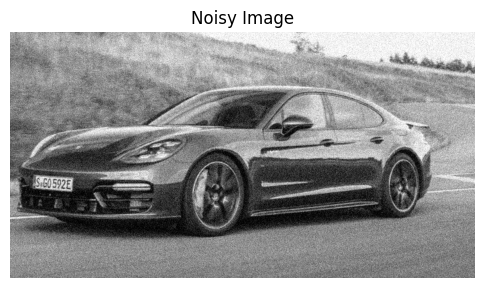

In [12]:
# Question 1.2 - Adding Gaussian noise to the grayscale image
mean = 0
stddev = 25
noise = np.random.normal(mean, stddev, image_grayscale.shape)
noisy_image = image_grayscale + noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
# Display the noisy image (Figure 2)
plt.figure(figsize=(6, 6))
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
plt.show()


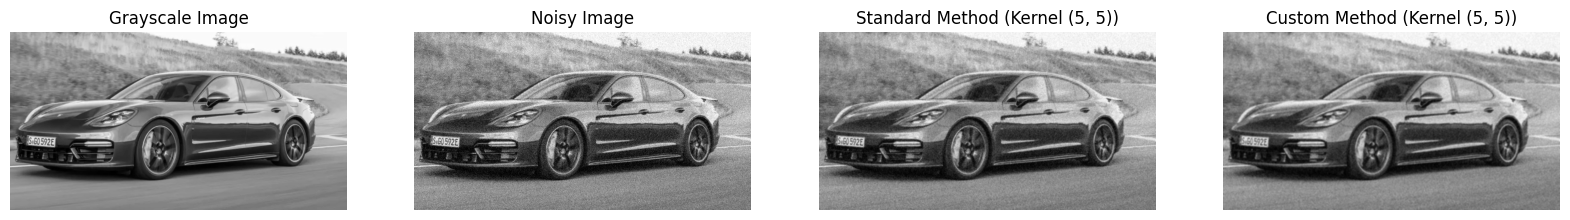

In [13]:
# Question 1.3 & 1.4: Noise removal using standard (Gaussian Blur) and custom kernel methods
def custom_kernel_blur(image, kernel_size):
    kernel = np.ones(kernel_size, np.float32) / (kernel_size[0] * kernel_size[1])
    return cv2.filter2D(image, -1, kernel)

# Apply noise removal with kernel (5,5)
kernel_size = (5, 5)
noiseremove_image_standard = cv2.GaussianBlur(noisy_image, kernel_size, 0)
noiseremove_image_kernel = custom_kernel_blur(noisy_image, kernel_size)

# Display Grayscale, Noisy, Standard noise removal, and Custom noise removal (Figure 2)
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

ax[0].imshow(image_grayscale, cmap='gray')
ax[0].set_title('Grayscale Image')
ax[0].axis('off')

ax[1].imshow(noisy_image, cmap='gray')
ax[1].set_title('Noisy Image')
ax[1].axis('off')

ax[2].imshow(noiseremove_image_standard, cmap='gray')
ax[2].set_title(f'Standard Method (Kernel {kernel_size})')
ax[2].axis('off')

ax[3].imshow(noiseremove_image_kernel, cmap='gray')
ax[3].set_title(f'Custom Method (Kernel {kernel_size})')
ax[3].axis('off')

plt.show()

SSIM (Gaussian Blur): 0.7546
SSIM (Custom Kernel): 0.8075


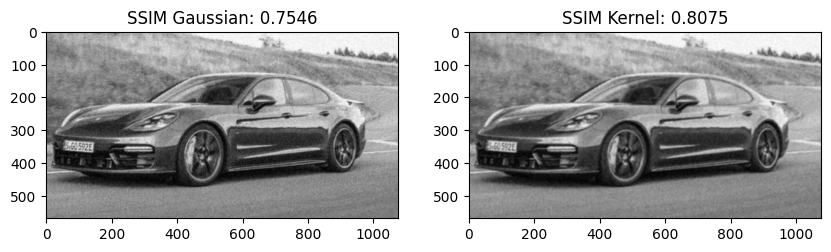

In [14]:
# Question 1.5 - SSIM comparison between the two methods
ssim_standard = ssim(image_grayscale, noiseremove_image_standard)
ssim_kernel = ssim(image_grayscale, noiseremove_image_kernel)

print(f'SSIM (Gaussian Blur): {ssim_standard:.4f}')
print(f'SSIM (Custom Kernel): {ssim_kernel:.4f}')

# Plot the comparison
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(noiseremove_image_standard, cmap='gray')
ax[0].set_title(f'SSIM Gaussian: {ssim_standard:.4f}')

ax[1].imshow(noiseremove_image_kernel, cmap='gray')
ax[1].set_title(f'SSIM Kernel: {ssim_kernel:.4f}')

plt.show()

In [ ]:
# Question 1.6: Create an array of kernel sizes (from 5 to 50, step 10 with odd values)
kernel_sizes = [(i, i) for i in range(5, 55, 10)]  # [(5, 5), (15, 15), ..., (45, 45)]

# Initialize lists to store SSIM values for each method
ssim_standard_list = []
ssim_kernel_list = []

# Plot the results in a single figure with multiple subplots
fig, ax = plt.subplots(len(kernel_sizes), 3, figsize=(15, len(kernel_sizes) * 5))

for i, kernel_size in enumerate(kernel_sizes):
    # Apply Gaussian Blur (Standard method)
    noiseremove_image_standard = cv2.GaussianBlur(noisy_image, kernel_size, 0)
    
    # Apply Custom Kernel Blur
    noiseremove_image_kernel = custom_kernel_blur(noisy_image, kernel_size)
    
    # Compute SSIM for both methods
    ssim_standard = ssim(image_grayscale, noiseremove_image_standard)
    ssim_kernel = ssim(image_grayscale, noiseremove_image_kernel)
    
    # Store SSIM values for plotting later
    ssim_standard_list.append(ssim_standard)
    ssim_kernel_list.append(ssim_kernel)
    
    # Plot results for each kernel size
    ax[i, 0].imshow(noisy_image, cmap='gray')
    ax[i, 0].set_title(f'Noisy Image (Kernel {kernel_size})')
    ax[i, 0].axis('off')
    
    ax[i, 1].imshow(noiseremove_image_standard, cmap='gray')
    ax[i, 1].set_title(f'Standard Method (Kernel {kernel_size})\nSSIM: {ssim_standard:.4f}')
    ax[i, 1].axis('off')
    
    ax[i, 2].imshow(noiseremove_image_kernel, cmap='gray')
    ax[i, 2].set_title(f'Custom Kernel (Kernel {kernel_size})\nSSIM: {ssim_kernel:.4f}')
    ax[i, 2].axis('off')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

# Plot SSIM comparison for different kernel sizes
plt.figure(figsize=(10, 6))
plt.plot([size[0] for size in kernel_sizes], ssim_standard_list, label='Gaussian Blur SSIM', marker='o')
plt.plot([size[0] for size in kernel_sizes], ssim_kernel_list, label='Custom Kernel SSIM', marker='x')
plt.xlabel('Kernel Size')
plt.ylabel('SSIM')
plt.title('SSIM Comparison for Different Kernel Sizes')
plt.legend()
plt.grid(True)
plt.show()


# Task 2

In [16]:
# Step 1: Generate matrices A and B
A = np.random.randn(64, 64).astype(np.int32)
B = np.random.randn(64, 64).astype(np.int32)
image_A = Image.fromarray(A)
image_B = Image.fromarray(B)
H_A = np.hstack((A, B))
H_B = np.vstack((A, B))
image_H_A = Image.fromarray(H_A)
image_H_B = Image.fromarray(H_B)
array_H_A = np.array(image_H_A)
array_H_B = np.array(image_H_B)


image_H_A.show()
image_H_B.show()

In [17]:
# Chessboard test:
# Step 1: Generate a chessboard pattern
def create_chessboard(size):
    chessboard = np.zeros((size, size), dtype=np.int32)
    s = size // 8
    for i in range(8):
        for j in range(8):
            if (i + j) % 2 == 0:
                chessboard[i*s:(i+1)*s, j*s:(j+1)*s] = 255  # White square
    return chessboard

A = create_chessboard(64)
B = create_chessboard(64)

# Step 2: Convert matrices to images
image_A = Image.fromarray(A)
image_B = Image.fromarray(B)

# Step 3: Perform horizontal and vertical concatenation
H_A = np.hstack((A, B))
H_B = np.vstack((A, B))

# Convert concatenated arrays to images
image_H_A = Image.fromarray(H_A)
image_H_B = Image.fromarray(H_B)

# Step 4: Convert images back to numpy arrays
array_H_A = np.array(image_H_A)
array_H_B = np.array(image_H_B)

# Display the results
image_H_A.show()
image_H_B.show()


# Task 3

In [20]:
#%% calibration
# https://docs.opencv.org/3.4/dc/dbb/tutorial_py_calibration.html
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

objpoints = []
imgpoints = []
images = glob.glob(r'*.jpg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(3,3),(-1,-1),criteria)
        imgpoints.append(corners2)
        cv2.namedWindow("Resized_Window", cv2.WINDOW_NORMAL)
        cv2.resizeWindow("Resized_Window", 1800, 1080)
        img_draw = cv2.drawChessboardCorners(img, (9,6), corners2,ret)
        cv2.imshow("Resized_Window", img_draw)
        cv2.waitKey(50)

cv2.destroyAllWindows()

objpoints = np.array(objpoints)
imgpoints = np.array(imgpoints)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
np.savez(r'C.npz', mtx=mtx, dist=dist, rvecs=rvecs, tvecs=tvecs)


In [21]:
#%% pose estimation
def draw(img, corners, imgpts):
    corner = (tuple(corners[0].ravel()))
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 3)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 3)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 3)
    return img

# Load previously saved data
with np.load(r'C.npz') as X:
    mtx, dist, rvecs, tvecs = [X[i] for i in ('mtx','dist','rvecs','tvecs')]

axis = np.float32([[2,0,0], [0,2,0], [0,0,-2]]).reshape(-1,3)
images = glob.glob(r'*.jpg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    if ret == True:
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        ret1, rvec1, tvec1 = cv2.solvePnP(objp, corners2, mtx, dist)
        imgpts, jac = cv2.projectPoints(axis, rvec1, tvec1, mtx, dist)
        corners2 = corners2.astype(int)
        imgpts = imgpts.astype(int)
        cv2.namedWindow("Resized_Window", cv2.WINDOW_NORMAL)
        cv2.resizeWindow("Resized_Window", 1400, 1080)
        img = draw(img, corners2, imgpts)
        cv2.imshow("Resized_Window", img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

In [22]:
# Reprojection error
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print(f"Total error: {mean_error/len(objpoints)}")

Total error: 0.047422793760295796


Pose of the object in the camera frame: [-1.22283453  0.45603293 15.28512163]


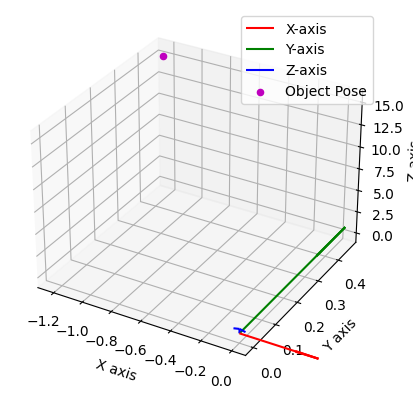

In [23]:
#%% Part C: Select a random image and plot pose
# Select a random image from the processed set
random_image_path = random.choice(images)
random_image = cv2.imread(random_image_path)
cv2.imshow('Random Image', random_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Assuming we use the first rvec and tvec from earlier (adjust if necessary)
rvec_random = rvec1
tvec_random = tvec1

#%% Part D: Find the pose of an object at [2, 5, 0] in the world frame
# Coordinates of the object in the world frame
P_world = np.array([2, 5, 0, 1])

# Construct extrinsic matrix for the random image using the random rvec and tvec
R_random, _ = cv2.Rodrigues(rvec_random)  # Convert rotation vector to matrix
extrinsic_random = np.hstack((R_random, tvec_random))

# Append [0, 0, 0, 1] to make it 4x4 homogeneous matrix
extrinsic_random = np.vstack((extrinsic_random, [0, 0, 0, 1]))

# Apply extrinsic transformation to world point
P_camera = extrinsic_random @ P_world

# Print the transformed point in the camera frame
print(f"Pose of the object in the camera frame: {P_camera[:3]}")

#%% Plotting the object pose in camera frame
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the camera's origin (0, 0, 0)
ax.quiver(0, 0, 0, 1, 0, 0, length=0.5, color='r', label='X-axis')
ax.quiver(0, 0, 0, 0, 1, 0, length=0.5, color='g', label='Y-axis')
ax.quiver(0, 0, 0, 0, 0, 1, length=0.5, color='b', label='Z-axis')

# Plot the object in camera frame
ax.scatter(P_camera[0], P_camera[1], P_camera[2], color='m', label='Object Pose')

# Set labels and show the plot
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend()
plt.show()
